In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import ensemble

In [3]:
# !pip install xgboost

In [4]:
import xgboost as xgb

In [50]:
energy_df = pd.read_csv('Combined_Data_for_model_final_2.csv')

In [51]:
energy_df.index[energy_df['Date'] == '2018-01-01 00:00:00']

Int64Index([70175], dtype='int64')

In [53]:
energy_df = energy_df[70175:]

In [54]:
energy_df.head()

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
70175,70175,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70176,70176,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70177,70177,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70178,70178,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70179,70179,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0


In [55]:
year_list = []
month_list = []
for time in energy_df['Date']:
    year = str(time)[:4]
    month = str(time)[5:7]
    year_list.append(year)
    month_list.append(month)

In [56]:
energy_df['month'] = [int(m) for m in month_list]

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/1033086053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['month'] = [int(m) for m in month_list]


In [61]:
energy_df

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month
70175,70175,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1
70176,70176,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1
70177,70177,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1
70178,70178,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1
70179,70179,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12


In [75]:
energy_df.reset_index(inplace=True)

In [78]:
energy_df.drop(columns = {'index', 'Unnamed: 0'}, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
energy_df['minute_interval'] = [int(energy_df['Date'][i][14:16]) for i in range(len(energy_df['Date']))]

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/3702667397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['minute_interval'] = [int(energy_df['Date'][i][14:16]) for i in range(len(energy_df['Date']))]


In [80]:
energy_df

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval
0,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0
1,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15
2,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30
3,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45
4,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45
140252,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0
140253,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15
140254,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30


In [81]:
months_unique = set(month_list)
months_unique

{'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'}

In [82]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               140256 non-null  object 
 1   Haryana Load (MW)  140256 non-null  float64
 2   temp               140256 non-null  float64
 3   dew                140256 non-null  float64
 4   humidity           140256 non-null  float64
 5   windspeed          140256 non-null  float64
 6   winddir            140256 non-null  float64
 7   cloudcover         140256 non-null  float64
 8   visibility         140256 non-null  float64
 9   month              140256 non-null  int64  
 10  Season             140256 non-null  int64  
 11  Hour of day        140256 non-null  int64  
 12  minute_interval    140256 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 13.9+ MB


In [83]:
def get_season(TimeSeries):
    
    season_list = []
    
    year_list = []
    month_list = []
    for time in TimeSeries:
        year = str(time)[:4]
        month = str(time)[5:7]
        year_list.append(year)
        month_list.append(month) 
       
    for m in month_list:
        if m=='01' or m=='02' or m=='12':
            season_list.append(0)   # Winter
        elif m=='03' or m=='04' or m=='05' or m=='06':
            season_list.append(1) #Spring-Summer
        elif m=='07' or m=='08' or m=='09':
            season_list.append(2) #Monsoon
        elif m=='10' or m=='11':
            season_list.append(3) #Autumn
            
    #season = pd.Series(season_list)
    return season_list

In [84]:
season = get_season(energy_df['Date'])

In [85]:
energy_df['Season'] = season

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/3056269085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Season'] = season


In [86]:
hour_list = []
for time in energy_df['Date']:
    hour = str(time)[11:13]
    hour_list.append(hour)
hour_list

['00',
 '00',
 '00',
 '00',
 '01',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '03',
 '03',
 '03',
 '03',
 '04',
 '04',
 '04',
 '04',
 '05',
 '05',
 '05',
 '05',
 '06',
 '06',
 '06',
 '06',
 '07',
 '07',
 '07',
 '07',
 '08',
 '08',
 '08',
 '08',
 '09',
 '09',
 '09',
 '09',
 '10',
 '10',
 '10',
 '10',
 '11',
 '11',
 '11',
 '11',
 '12',
 '12',
 '12',
 '12',
 '13',
 '13',
 '13',
 '13',
 '14',
 '14',
 '14',
 '14',
 '15',
 '15',
 '15',
 '15',
 '16',
 '16',
 '16',
 '16',
 '17',
 '17',
 '17',
 '17',
 '18',
 '18',
 '18',
 '18',
 '19',
 '19',
 '19',
 '19',
 '20',
 '20',
 '20',
 '20',
 '21',
 '21',
 '21',
 '21',
 '22',
 '22',
 '22',
 '22',
 '23',
 '23',
 '23',
 '23',
 '00',
 '00',
 '00',
 '00',
 '01',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '03',
 '03',
 '03',
 '03',
 '04',
 '04',
 '04',
 '04',
 '05',
 '05',
 '05',
 '05',
 '06',
 '06',
 '06',
 '06',
 '07',
 '07',
 '07',
 '07',
 '08',
 '08',
 '08',
 '08',
 '09',
 '09',
 '09',
 '09',
 '10',
 '10',
 '10',
 '10',
 '11',
 '11',
 '11',

In [87]:
energy_df['Hour of day'] = [int(hour) for hour in hour_list]

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/4120134434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Hour of day'] = [int(hour) for hour in hour_list]


In [88]:
energy_df

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval
0,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0
1,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15
2,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30
3,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45
4,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45
140252,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0
140253,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15
140254,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30


In [89]:
energy_df['Date'] = energy_df['Date'].astype('str')

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/522299285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Date'] = energy_df['Date'].astype('str')


In [90]:
energy_df['Day'] = [int(energy_df['Date'][i][8:10]) for i in range(len(energy_df['Date']))]
energy_df

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/2690122334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Day'] = [int(energy_df['Date'][i][8:10]) for i in range(len(energy_df['Date']))]


,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day
0,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0,1
1,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15,1
2,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30,1
3,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45,1
4,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31
140252,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31
140253,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31
140254,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31


In [91]:
day_list = []
energy_df['Date'] = pd.to_datetime(energy_df['Date'])
for time in energy_df['Date']:
    day = time.weekday()
    day_list.append(day)
energy_df['Day of Week'] = day_list

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/3472696509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Date'] = pd.to_datetime(energy_df['Date'])


In [92]:
energy_df

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week
0,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0,1,0
1,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15,1,0
2,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30,1,0
3,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45,1,0
4,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31,4
140252,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31,4
140253,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31,4
140254,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31,4


In [93]:
energy_df['Is Weekend'] = [day == 5 or day == 6 for day in energy_df['Day of Week']]

In [94]:
energy_df

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend
0,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0,1,0,False
1,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15,1,0,False
2,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30,1,0,False
3,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45,1,0,False
4,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31,4,False
140252,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31,4,False
140253,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31,4,False
140254,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31,4,False


In [95]:
clean_weekend = []
for b in energy_df['Is Weekend']:
    if b==True:
        clean_weekend.append(1)
    elif b==False:
        clean_weekend.append(0)
energy_df['Is Weekend Clean'] = clean_weekend

In [96]:
energy_df

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend,Is Weekend Clean
0,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0,1,0,False,0
1,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15,1,0,False,0
2,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30,1,0,False,0
3,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45,1,0,False,0
4,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0,1,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31,4,False,0
140252,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31,4,False,0
140253,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31,4,False,0
140254,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31,4,False,0


In [97]:
energy_df = energy_df.drop(columns=['Is Weekend'])

In [98]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               140256 non-null  datetime64[ns]
 1   Haryana Load (MW)  140256 non-null  float64       
 2   temp               140256 non-null  float64       
 3   dew                140256 non-null  float64       
 4   humidity           140256 non-null  float64       
 5   windspeed          140256 non-null  float64       
 6   winddir            140256 non-null  float64       
 7   cloudcover         140256 non-null  float64       
 8   visibility         140256 non-null  float64       
 9   month              140256 non-null  int64         
 10  Season             140256 non-null  int64         
 11  Hour of day        140256 non-null  int64         
 12  minute_interval    140256 non-null  int64         
 13  Day                140256 non-null  int64   

In [99]:
energy_df.drop(columns='Date', inplace=True)

In [101]:
energy_df.corr()

,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend Clean
Haryana Load (MW),1.000000,5.287925e-01,6.237268e-01,-1.227761e-02,9.617783e-02,-1.215033e-02,2.752907e-01,2.967744e-01,1.887261e-01,2.608364e-01,9.218044e-02,1.292587e-03,2.237665e-03,-4.525474e-02,-6.097971e-02
temp,0.528792,1.000000e+00,5.475620e-01,-5.964419e-01,3.635809e-01,1.317315e-01,2.350842e-01,6.941415e-01,5.520658e-02,3.708552e-01,2.124532e-01,4.151801e-16,-8.200574e-03,-8.490431e-03,-9.241106e-03
dew,0.623727,5.475620e-01,1.000000e+00,3.073068e-01,8.923046e-02,-1.563877e-01,5.550263e-01,3.024785e-01,2.464789e-01,4.756860e-01,-1.634083e-02,9.369761e-16,-3.176687e-02,3.952303e-03,-2.338387e-03
humidity,-0.012278,-5.964419e-01,3.073068e-01,1.000000e+00,-3.209710e-01,-2.935941e-01,2.846576e-01,-5.095863e-01,1.512709e-01,5.521566e-03,-2.813541e-01,4.216231e-16,-4.249813e-03,1.160068e-02,7.276181e-03
windspeed,0.096178,3.635809e-01,8.923046e-02,-3.209710e-01,1.000000e+00,4.692280e-01,1.840549e-01,3.168213e-01,-1.741563e-01,-8.091921e-02,1.456633e-01,-7.637600e-16,1.337627e-02,3.198209e-02,2.305900e-02
winddir,-0.012150,1.317315e-01,-1.563877e-01,-2.935941e-01,4.692280e-01,1.000000e+00,-1.008056e-01,1.099983e-01,-1.120514e-01,-9.210767e-02,1.294489e-01,-5.963243e-16,3.041617e-02,8.453307e-03,2.042488e-02
cloudcover,0.275291,2.350842e-01,5.550263e-01,2.846576e-01,1.840549e-01,-1.008056e-01,1.000000e+00,9.876183e-02,3.712126e-02,1.197471e-01,1.905457e-02,6.299153e-16,4.645948e-03,-1.187508e-02,-1.438218e-02
visibility,0.296774,6.941415e-01,3.024785e-01,-5.095863e-01,3.168213e-01,1.099983e-01,9.876183e-02,1.000000e+00,-1.079342e-02,2.356951e-01,2.024809e-01,3.583178e-17,2.344925e-02,-7.740123e-04,3.125006e-03
month,0.188726,5.520658e-02,2.464789e-01,1.512709e-01,-1.741563e-01,-1.120514e-01,3.712126e-02,-1.079342e-02,1.000000e+00,5.791215e-01,3.850860e-16,1.807423e-15,1.052232e-02,-7.331987e-04,6.426685e-04
Season,0.260836,3.708552e-01,4.756860e-01,5.521566e-03,-8.091921e-02,-9.210767e-02,1.197471e-01,2.356951e-01,5.791215e-01,1.000000e+00,-2.162869e-17,1.258080e-15,8.251953e-03,8.992044e-04,8.197421e-05


In [102]:
energy_df

,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend Clean
0,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0
1,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15,1,0,0
2,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30,1,0,0
3,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45,1,0,0
4,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31,4,0
140252,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31,4,0
140253,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31,4,0
140254,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31,4,0


In [103]:
df_train = energy_df.iloc[:int(energy_df.shape[0]*0.7)]

In [104]:
df_train

,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend Clean
0,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0
1,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15,1,0,0
2,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30,1,0,0
3,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45,1,0,0
4,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98174,6730.30,33.0,10.0,24.40,16.6,310.0,0.0,4.0,10,3,15,30,19,0,0
98175,6720.85,33.0,10.0,24.40,16.6,310.0,0.0,4.0,10,3,15,45,19,0,0
98176,6738.86,32.0,10.0,25.82,14.8,300.0,0.0,4.0,10,3,16,0,19,0,0
98177,6756.65,32.0,10.0,25.82,14.8,300.0,0.0,4.0,10,3,16,15,19,0,0


In [297]:
df_test = energy_df[df_train.shape[0]:]

In [298]:
df_test

,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend Clean
98179,6699.14,32.0,10.0,25.82,14.8,300.0,0.0,4.0,10,3,16,45,19,0,0
98180,6749.01,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,0,19,0,0
98181,6409.50,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,15,19,0,0
98182,6576.38,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,30,19,0,0
98183,6282.79,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,45,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31,4,0
140252,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31,4,0
140253,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31,4,0
140254,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31,4,0


In [108]:
X = df_train.drop(columns='Haryana Load (MW)')

In [109]:
X

,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend Clean
0,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0
1,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,15,1,0,0
2,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,30,1,0,0
3,11.0,9.0,87.48,0.0,0.0,0.0,1.0,1,0,0,45,1,0,0
4,10.0,8.0,87.38,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98174,33.0,10.0,24.40,16.6,310.0,0.0,4.0,10,3,15,30,19,0,0
98175,33.0,10.0,24.40,16.6,310.0,0.0,4.0,10,3,15,45,19,0,0
98176,32.0,10.0,25.82,14.8,300.0,0.0,4.0,10,3,16,0,19,0,0
98177,32.0,10.0,25.82,14.8,300.0,0.0,4.0,10,3,16,15,19,0,0


In [292]:
X.to_csv('x_train.csv')

In [110]:
y_train = energy_df['Haryana Load (MW)'][:df_train.shape[0]]

In [111]:
y_train

0        3880.22
1        3778.15
2        3742.81
3        3627.39
4        3616.50
          ...   
98174    6730.30
98175    6720.85
98176    6738.86
98177    6756.65
98178    6769.57
Name: Haryana Load (MW), Length: 98179, dtype: float64

In [293]:
y_train.to_csv('y_train.csv')

In [300]:
df_test

,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend Clean
98179,6699.14,32.0,10.0,25.82,14.8,300.0,0.0,4.0,10,3,16,45,19,0,0
98180,6749.01,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,0,19,0,0
98181,6409.50,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,15,19,0,0
98182,6576.38,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,30,19,0,0
98183,6282.79,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,45,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31,4,0
140252,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31,4,0
140253,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31,4,0
140254,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31,4,0


In [112]:
df_test.drop(columns='Haryana Load (MW)', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [301]:
df_test

,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend Clean
98179,6699.14,32.0,10.0,25.82,14.8,300.0,0.0,4.0,10,3,16,45,19,0,0
98180,6749.01,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,0,19,0,0
98181,6409.50,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,15,19,0,0
98182,6576.38,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,30,19,0,0
98183,6282.79,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,45,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31,4,0
140252,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31,4,0
140253,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31,4,0
140254,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31,4,0


In [114]:
# mpo = scaler.fit_transform(df_test)

In [115]:
# predictions = reg.predict(mpo)

In [116]:
# predictions = pd.DataFrame(predictions)

In [303]:
df_test.drop(columns='Haryana Load (MW)', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [305]:
df_test.to_csv('x_test.csv')

In [117]:
y_test = energy_df['Haryana Load (MW)'].iloc[df_train.shape[0]:]

In [118]:
y_test

98179     6699.14
98180     6749.01
98181     6409.50
98182     6576.38
98183     6282.79
           ...   
140251    4712.55
140252    4649.58
140253    4571.39
140254    4510.39
140255    4449.94
Name: Haryana Load (MW), Length: 42077, dtype: float64

In [296]:
df_test

,index,Haryana Load (MW),Date
0,98179,6699.14,2020-10-19 16:45:00
1,98180,6749.01,2020-10-19 17:00:00
2,98181,6409.50,2020-10-19 17:15:00
3,98182,6576.38,2020-10-19 17:30:00
4,98183,6282.79,2020-10-19 17:45:00
...,...,...,...
42072,140251,4712.55,2021-12-31 22:45:00
42073,140252,4649.58,2021-12-31 23:00:00
42074,140253,4571.39,2021-12-31 23:15:00
42075,140254,4510.39,2021-12-31 23:30:00


In [294]:
df_test.to_csv('x_test.csv')

In [295]:
y_test.to_csv('y_test.csv')

In [119]:
import sklearn

In [120]:
# r2s = sklearn.metrics.r2_score(y_test, predictions[0])
# r2s

In [121]:
# params = {
#     "n_estimators": 1000,
#     "max_depth": 4,
#     "min_samples_split": 5,
#     "learning_rate": 0.1,
#     "loss": "squared_error",
# }

In [122]:
model = xgb.XGBRFRegressor()

In [123]:
model.fit(X, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [124]:
xgb_predictions = model.predict(df_test)

In [125]:
xgb_predictions

array([6454.06  , 6412.4146, 6412.4146, ..., 4652.2334, 4652.2334,
       4652.2334], dtype=float32)

In [126]:
r2s = sklearn.metrics.r2_score(y_test, xgb_predictions)
r2s

0.6637291791833022

In [134]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [135]:
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

In [136]:
rmse

973.8526313223942

In [139]:
mx = y_test.max()
mn = y_test.min()
nrmse = rmse/(mx - mn)

In [140]:
nrmse

0.09355179137698472

In [141]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [142]:
MAPE(y_test, xgb_predictions)

11.811473672655664

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

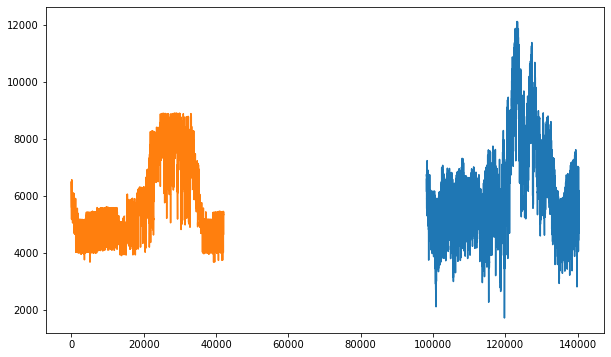

In [196]:
plt.plot(y_test)
plt.plot(xgb_predictions)
plt.show()

In [197]:
df_test = pd.DataFrame(y_test)

In [198]:
df_test.reset_index(inplace=True)

In [199]:
xgb_predictions

array([6454.06  , 6412.4146, 6412.4146, ..., 4652.2334, 4652.2334,
       4652.2334], dtype=float32)

In [200]:
df_xgb_predictions = pd.DataFrame(xgb_predictions)

In [201]:
df_xgb_predictions.rename(columns = {0: 'predictions'}, inplace=True)

In [202]:
df_xgb_predictions.reset_index(inplace=True)

In [203]:
df_xgb_predictions

,index,predictions
0,0,6454.060059
1,1,6412.414551
2,2,6412.414551
3,3,6412.414551
4,4,6412.414551
...,...,...
42072,42072,4701.144043
42073,42073,4652.233398
42074,42074,4652.233398
42075,42075,4652.233398


In [204]:
energy_df_2 = pd.read_csv('Combined_Data_for_model_final_2.csv')

In [205]:
energy_df_2

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,0,2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,0.0,0.0,27.4,1.0
1,1,2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,0.0,0.0,27.4,1.0
2,2,2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,0.0,0.0,27.4,1.0
3,3,2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,0.0,0.0,27.4,1.0
4,4,2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


In [206]:
energy_df_2 = energy_df_2[70175:]

In [207]:
energy_df_2_test = energy_df_2[98179:]

In [208]:
test_dates = pd.DataFrame(energy_df_2_test['Date'])

In [209]:
test_dates.reset_index(inplace=True)

In [210]:
test_dates['Date']

0        2020-10-19 16:45:00
1        2020-10-19 17:00:00
2        2020-10-19 17:15:00
3        2020-10-19 17:30:00
4        2020-10-19 17:45:00
                ...         
42072    2021-12-31 22:45:00
42073    2021-12-31 23:00:00
42074    2021-12-31 23:15:00
42075    2021-12-31 23:30:00
42076    2021-12-31 23:45:00
Name: Date, Length: 42077, dtype: object

In [211]:
test_dates

,index,Date
0,168354,2020-10-19 16:45:00
1,168355,2020-10-19 17:00:00
2,168356,2020-10-19 17:15:00
3,168357,2020-10-19 17:30:00
4,168358,2020-10-19 17:45:00
...,...,...
42072,210426,2021-12-31 22:45:00
42073,210427,2021-12-31 23:00:00
42074,210428,2021-12-31 23:15:00
42075,210429,2021-12-31 23:30:00


In [306]:
test_dates.to_csv('test_dates.csv')

In [212]:
test_dates['Date']

0        2020-10-19 16:45:00
1        2020-10-19 17:00:00
2        2020-10-19 17:15:00
3        2020-10-19 17:30:00
4        2020-10-19 17:45:00
                ...         
42072    2021-12-31 22:45:00
42073    2021-12-31 23:00:00
42074    2021-12-31 23:15:00
42075    2021-12-31 23:30:00
42076    2021-12-31 23:45:00
Name: Date, Length: 42077, dtype: object

In [213]:
df_test['Date'] = test_dates['Date']
df_xgb_predictions['Date'] = test_dates['Date']

In [214]:
df_test

,index,Haryana Load (MW),Date
0,98179,6699.14,2020-10-19 16:45:00
1,98180,6749.01,2020-10-19 17:00:00
2,98181,6409.50,2020-10-19 17:15:00
3,98182,6576.38,2020-10-19 17:30:00
4,98183,6282.79,2020-10-19 17:45:00
...,...,...,...
42072,140251,4712.55,2021-12-31 22:45:00
42073,140252,4649.58,2021-12-31 23:00:00
42074,140253,4571.39,2021-12-31 23:15:00
42075,140254,4510.39,2021-12-31 23:30:00


In [216]:
df_xgb_predictions

,index,predictions,Date
0,0,6454.060059,2020-10-19 16:45:00
1,1,6412.414551,2020-10-19 17:00:00
2,2,6412.414551,2020-10-19 17:15:00
3,3,6412.414551,2020-10-19 17:30:00
4,4,6412.414551,2020-10-19 17:45:00
...,...,...,...
42072,42072,4701.144043,2021-12-31 22:45:00
42073,42073,4652.233398,2021-12-31 23:00:00
42074,42074,4652.233398,2021-12-31 23:15:00
42075,42075,4652.233398,2021-12-31 23:30:00


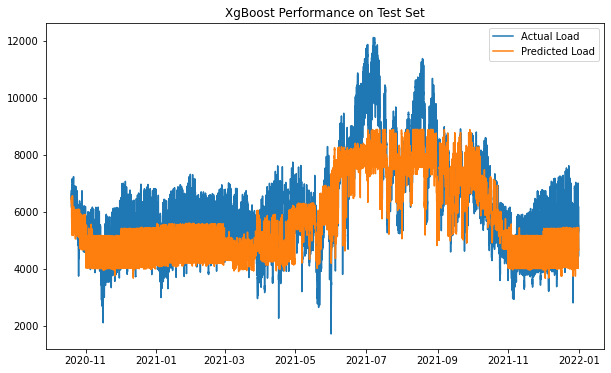

In [224]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(pd.to_datetime(df_test['Date']), df_test['Haryana Load (MW)'])
plt.plot(pd.to_datetime(df_xgb_predictions['Date']), df_xgb_predictions['predictions'])
plt.legend(['Actual Load', 'Predicted Load'])
plt.title('XgBoost Performance on Test Set')
plt.show()

## Work with future data

In [225]:
fdf = pd.read_csv('processed_future_data.csv')

In [226]:
fdf

,Unnamed: 0,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...,...
1340,1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [227]:
factual = pd.read_csv('future_actual_load.csv')

In [229]:
factual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-06-14 00:15:00,9000.18
1,1,2022-06-14 00:30:00,8768.38
2,2,2022-06-14 00:45:00,8777.00
3,3,2022-06-14 01:00:00,9093.66
4,4,2022-06-14 01:15:00,9082.27
...,...,...,...
564,564,2022-06-19 22:45:00,7538.72
565,565,2022-06-19 23:00:00,7307.08
566,566,2022-06-19 23:15:00,7204.57
567,567,2022-06-19 23:30:00,7194.45


In [230]:
fdf.index[fdf['Date'] == '2022-06-14 00:15:00']

Int64Index([97], dtype='int64')

In [231]:
fdf.index[fdf['Date'] == '2022-06-19 23:45:00']

Int64Index([671], dtype='int64')

In [233]:
fdf = fdf.iloc[97:672]

In [235]:
fdf.reset_index(inplace=True)

In [238]:
fdf.drop(columns=['index', 'Unnamed: 0'], inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [239]:
fdf

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-14 00:15:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1
1,2022-06-14 00:30:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1
2,2022-06-14 00:45:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1
3,2022-06-14 01:00:00,35.6,16.6,32.45,28.1,270.1,24.1,24.1
4,2022-06-14 01:15:00,35.6,16.6,32.45,28.1,270.1,24.1,24.1
...,...,...,...,...,...,...,...,...
570,2022-06-19 22:45:00,36.2,14.2,26.93,15.5,289.5,97.1,23.8
571,2022-06-19 23:00:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6
572,2022-06-19 23:15:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6
573,2022-06-19 23:30:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6


## Extract Calendar features from future data

In [241]:
year_list = []
month_list = []
for time in fdf['Date']:
    year = str(time)[:4]
    month = str(time)[5:7]
    year_list.append(year)
    month_list.append(month)

In [242]:
fdf['month'] = month_list

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/2651599657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['month'] = month_list


In [243]:
fdf['month'] = [int(m) for m in month_list]

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/3297128120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['month'] = [int(m) for m in month_list]


In [244]:
fdf

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month
0,2022-06-14 00:15:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6
1,2022-06-14 00:30:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6
2,2022-06-14 00:45:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6
3,2022-06-14 01:00:00,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6
4,2022-06-14 01:15:00,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6
...,...,...,...,...,...,...,...,...,...
570,2022-06-19 22:45:00,36.2,14.2,26.93,15.5,289.5,97.1,23.8,6
571,2022-06-19 23:00:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6
572,2022-06-19 23:15:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6
573,2022-06-19 23:30:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6


In [246]:
fdf['minute_interval'] = [int(fdf['Date'][i][14:16]) for i in range(len(fdf['Date']))]

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/3162493307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['minute_interval'] = [int(fdf['Date'][i][14:16]) for i in range(len(fdf['Date']))]


In [247]:
months_unique = set(month_list)
months_unique

{'06'}

In [248]:
fdf['Season'] = 1

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/1539858658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Season'] = 1


In [250]:
hour_list = []
for time in fdf['Date']:
    hour = str(time)[11:13]
    hour_list.append(hour)
hour_list

['00',
 '00',
 '00',
 '01',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '03',
 '03',
 '03',
 '03',
 '04',
 '04',
 '04',
 '04',
 '05',
 '05',
 '05',
 '05',
 '06',
 '06',
 '06',
 '06',
 '07',
 '07',
 '07',
 '07',
 '08',
 '08',
 '08',
 '08',
 '09',
 '09',
 '09',
 '09',
 '10',
 '10',
 '10',
 '10',
 '11',
 '11',
 '11',
 '11',
 '12',
 '12',
 '12',
 '12',
 '13',
 '13',
 '13',
 '13',
 '14',
 '14',
 '14',
 '14',
 '15',
 '15',
 '15',
 '15',
 '16',
 '16',
 '16',
 '16',
 '17',
 '17',
 '17',
 '17',
 '18',
 '18',
 '18',
 '18',
 '19',
 '19',
 '19',
 '19',
 '20',
 '20',
 '20',
 '20',
 '21',
 '21',
 '21',
 '21',
 '22',
 '22',
 '22',
 '22',
 '23',
 '23',
 '23',
 '23',
 '00',
 '00',
 '00',
 '00',
 '01',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '03',
 '03',
 '03',
 '03',
 '04',
 '04',
 '04',
 '04',
 '05',
 '05',
 '05',
 '05',
 '06',
 '06',
 '06',
 '06',
 '07',
 '07',
 '07',
 '07',
 '08',
 '08',
 '08',
 '08',
 '09',
 '09',
 '09',
 '09',
 '10',
 '10',
 '10',
 '10',
 '11',
 '11',
 '11',
 '11',

In [252]:
fdf['Hour of day'] = [int(hour) for hour in hour_list]

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/1161060931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Hour of day'] = [int(hour) for hour in hour_list]


In [253]:
fdf['minute_interval'] = [int(fdf['Date'][i][14:16]) for i in range(len(fdf['Date']))]

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/3162493307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['minute_interval'] = [int(fdf['Date'][i][14:16]) for i in range(len(fdf['Date']))]


In [254]:
fdf['Date'] = fdf['Date'].astype('str')

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/2073617660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Date'] = fdf['Date'].astype('str')


In [255]:
fdf['Day'] = [int(fdf['Date'][i][8:10]) for i in range(len(fdf['Date']))]
fdf

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/4176221197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Day'] = [int(fdf['Date'][i][8:10]) for i in range(len(fdf['Date']))]


,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,minute_interval,Season,Hour of day,Day
0,2022-06-14 00:15:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,15,1,0,14
1,2022-06-14 00:30:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,30,1,0,14
2,2022-06-14 00:45:00,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,45,1,0,14
3,2022-06-14 01:00:00,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6,0,1,1,14
4,2022-06-14 01:15:00,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6,15,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2022-06-19 22:45:00,36.2,14.2,26.93,15.5,289.5,97.1,23.8,6,45,1,22,19
571,2022-06-19 23:00:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,0,1,23,19
572,2022-06-19 23:15:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,15,1,23,19
573,2022-06-19 23:30:00,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,30,1,23,19


In [257]:
day_list = []
fdf['Date'] = pd.to_datetime(fdf['Date'])
for time in fdf['Date']:
    day = time.weekday()
    day_list.append(day)
fdf['Day of Week'] = day_list

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/295981053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Date'] = pd.to_datetime(fdf['Date'])
C:\Users\HP\AppData\Local\Temp/ipykernel_6252/295981053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Day of Week'] = day_list


In [260]:
fdf.drop(columns='Date', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [262]:
fdf

,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,minute_interval,Season,Hour of day,Day,Day of Week
0,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,15,1,0,14,1
1,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,30,1,0,14,1
2,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,45,1,0,14,1
3,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6,0,1,1,14,1
4,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6,15,1,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,36.2,14.2,26.93,15.5,289.5,97.1,23.8,6,45,1,22,19,6
571,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,0,1,23,19,6
572,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,15,1,23,19,6
573,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,30,1,23,19,6


In [263]:
fdf['Is Weekend'] = [day == 5 or day == 6 for day in fdf['Day of Week']]

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/1739564402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Is Weekend'] = [day == 5 or day == 6 for day in fdf['Day of Week']]


In [264]:
clean_weekend = []
for b in fdf['Is Weekend']:
    if b==True:
        clean_weekend.append(1)
    elif b==False:
        clean_weekend.append(0)
fdf['Is Weekend Clean'] = clean_weekend

C:\Users\HP\AppData\Local\Temp/ipykernel_6252/1158188346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Is Weekend Clean'] = clean_weekend


In [268]:
fdf.drop(columns='Is Weekend', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [288]:
fdf

,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,minute_interval,Season,Hour of day,Day,Day of Week,Is Weekend Clean
0,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,15,1,0,14,1,0
1,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,30,1,0,14,1,0
2,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,45,1,0,14,1,0
3,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6,0,1,1,14,1,0
4,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6,15,1,1,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,36.2,14.2,26.93,15.5,289.5,97.1,23.8,6,45,1,22,19,6,1
571,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,0,1,23,19,6,1
572,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,15,1,23,19,6,1
573,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,30,1,23,19,6,1


In [272]:
fpredictions = model.predict(fdf)

In [286]:
pd.DataFrame(fpredictions)

,0
0,7863.048340
1,7863.048340
2,7863.048340
3,8011.908691
4,7859.647949
...,...
570,7856.751953
571,8031.522461
572,7856.751953
573,7856.751953


In [273]:
factualarray = factual['Haryana Load (MW)']

In [278]:
factual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-06-14 00:15:00,9000.18
1,1,2022-06-14 00:30:00,8768.38
2,2,2022-06-14 00:45:00,8777.00
3,3,2022-06-14 01:00:00,9093.66
4,4,2022-06-14 01:15:00,9082.27
...,...,...,...
564,564,2022-06-19 22:45:00,7538.72
565,565,2022-06-19 23:00:00,7307.08
566,566,2022-06-19 23:15:00,7204.57
567,567,2022-06-19 23:30:00,7194.45


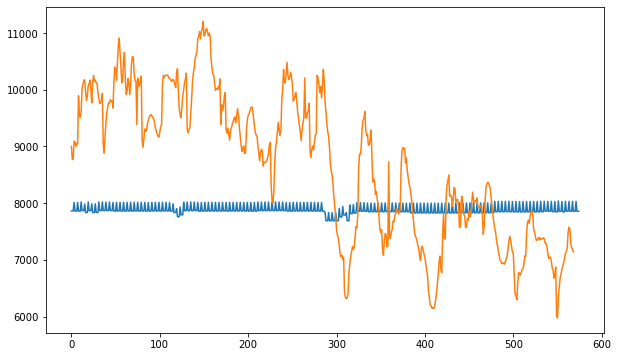

In [274]:
plt.plot(fpredictions)
plt.plot(factualarray)


In [290]:
fdf

,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,minute_interval,Season,Hour of day,Day,Day of Week,Is Weekend Clean
0,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,15,1,0,14,1,0
1,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,30,1,0,14,1,0
2,36.6,16.1,29.75,28.1,267.1,9.0,24.1,6,45,1,0,14,1,0
3,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6,0,1,1,14,1,0
4,35.6,16.6,32.45,28.1,270.1,24.1,24.1,6,15,1,1,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,36.2,14.2,26.93,15.5,289.5,97.1,23.8,6,45,1,22,19,6,1
571,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,0,1,23,19,6,1
572,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,15,1,23,19,6,1
573,36.3,13.6,25.76,13.7,289.8,98.3,23.6,6,30,1,23,19,6,1


In [287]:
factual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-06-14 00:15:00,9000.18
1,1,2022-06-14 00:30:00,8768.38
2,2,2022-06-14 00:45:00,8777.00
3,3,2022-06-14 01:00:00,9093.66
4,4,2022-06-14 01:15:00,9082.27
...,...,...,...
564,564,2022-06-19 22:45:00,7538.72
565,565,2022-06-19 23:00:00,7307.08
566,566,2022-06-19 23:15:00,7204.57
567,567,2022-06-19 23:30:00,7194.45


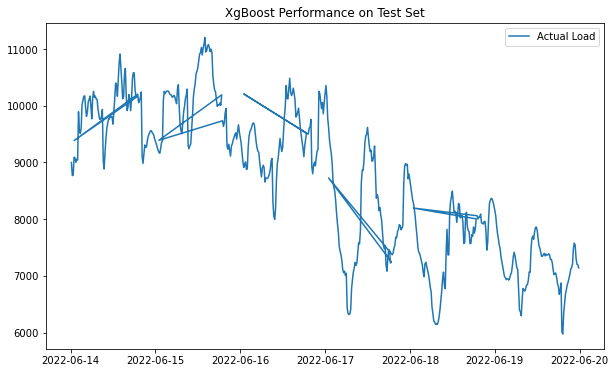

In [291]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(pd.to_datetime(factual['Date']), factual['Haryana Load (MW)'])
# plt.plot(pd.to_datetime(factual['Date']), fpredictions[:569])
plt.legend(['Actual Load', 'Predicted Load'])
plt.title('XgBoost Performance on Test Set')
plt.show()